<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          🐥🎯NLP: Twitter Sentiment Analysis🐥🎯
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this notebook, I am building a model to predict sentiment from thousands of tweets</b>
    
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>🐥🎯NLP: Twitter Sentiment Analysis🐥🎯</b>
</p>
   <p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
    <b>Some thing to Note:</b><br>
    <b>1.</b> In this project i will take raw recipe data, prepare it, load and finetune a distilled verison of GPT-2, and generate realistic, accurate recipes when prompting your model with ingredient lists.
    <br><br><b>2. </b>In the past few years, many content creators have come forward to create content to help people with their mental health. Many organizations can use stress detection to find which social media users are stressed to help them quickly.
    <br><br><b>3. </b>Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not. This dataset contains 116 columns.  
    <br><br><b>4. </b>dataset contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress.
     <br><br><b>5. </b> Now lets start

</p>


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
    <b>Project Structure:</b><br>
    <b>Task 1</b> : An introduction to the problem, including a short demo
    <br><br><b>Task 2</b> : Explortory data analsysis of our data, and some basic preprocessing
    <br><br><b>Task 3 </b> : Dataset preparation for our modeling
    <br><br><b>Task 4</b> : Basic usecase of distillation and GPT-2
     <br><br><b>Task 5</b> : Launching training on a Google Colab instance with Google Drive integration
<br><br><b>Task 6</b> : Exploring how well our model generates realistic recipes 
</p>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Importing the required packages</b>

In [68]:
#Data manipulation imports
import numpy as np
import pandas as pd

#Data Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling imports
from sklearn.model_selection import train_test_split

#Additional imports
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Loading and checking the data</b>

In [69]:
#Loading and printing head of df
tweet =pd.read_csv("/kaggle/input/nlptwitter/twitter.csv",index_col=None)
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [70]:
#Chekcing summary of the tweet df
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [71]:
#Checking for statistical info
tweet.describe(include='O')

,tweet
count,31962
unique,29530
top,#model i love u take with u all the time in ...
freq,319


In [72]:
#Dropping redundant columns
tweet = tweet.drop(['id'], axis=1)
tweet.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Some EDA</b>

label    0
tweet    0
dtype: int64

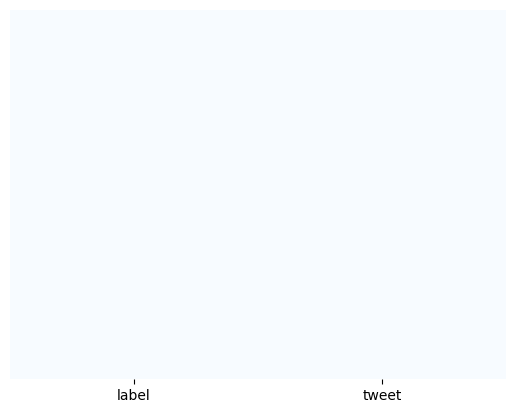

In [73]:
#Heatmap to find isnull
sns.heatmap(tweet.isnull(),yticklabels=False, cbar=False,cmap='Blues' )
#or
tweet.isna().sum().sort_values(ascending=False)

0    29720
1     2242
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

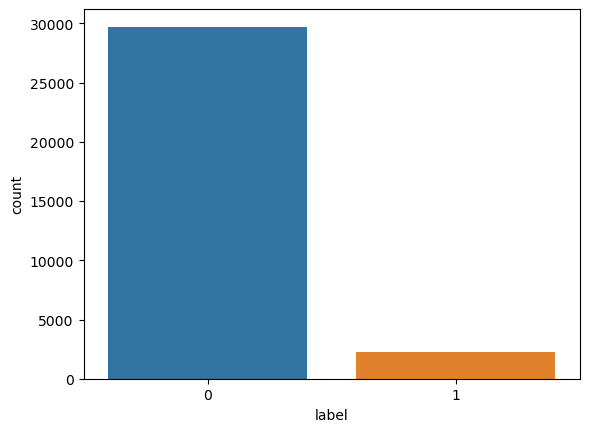

In [76]:
#Checking the balance of the Target variable
print(tweet['label'].value_counts())

#or
#Countplot for target valiable
sns.countplot(x='label', data=tweet, label='Count')

In [78]:
#Calculating and adding len of twwet['tweet']
tweet['len'] = tweet['tweet'].apply(len)
tweet.head()

,label,tweet,len
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [79]:
#Describing tweet df
tweet.describe(include='all')

,label,tweet,len
count,31962.000000,31962,31962.000000
unique,NaN,29530,NaN
top,NaN,#model i love u take with u all the time in ...,NaN
freq,NaN,319,NaN
mean,0.070146,NaN,84.739628
std,0.255397,NaN,29.455749
min,0.000000,NaN,11.000000
25%,0.000000,NaN,63.000000
50%,0.000000,NaN,88.000000
75%,0.000000,NaN,108.000000


In [88]:
#Checking for smallest, largest and average tweet
print(tweet[tweet['len']==11]['tweet'])
print('\n')
print(tweet[tweet['len']==274]['tweet'])
print('\n')
print(tweet[tweet['len']==84]['tweet'])

25195    i love you 
Name: tweet, dtype: object


19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object


43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object


array([[<AxesSubplot:title={'center':'len'}>]], dtype=object)

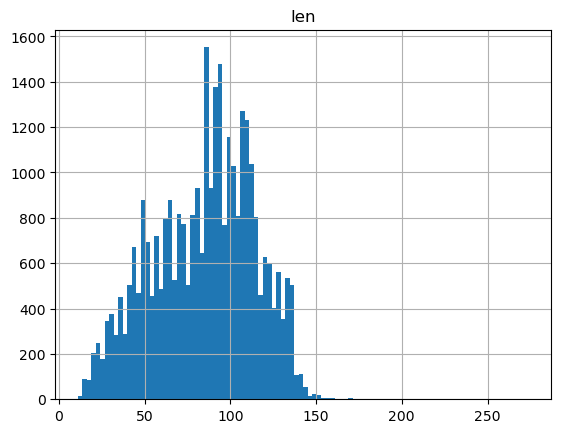

In [95]:
#Plotting histogram for len of tweets
tweet.hist('len', bins=100)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Some EDA with WordCloud</b>

In [107]:
%%time
#Categorising inot pos and neg
pos = tweet[tweet['label']==0]
neg = tweet[tweet['label']==1]

#creating sentences
sentences = tweet['tweet'].tolist()
len(sentences)

#now sentences as one string
sentence_joined = " ".join(sentences)
#print(sentence_joined)

CPU times: user 6.59 ms, sys: 1.97 ms, total: 8.56 ms
Wall time: 8.06 ms


In [100]:
#WordCloud
!pip install wordcloud

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


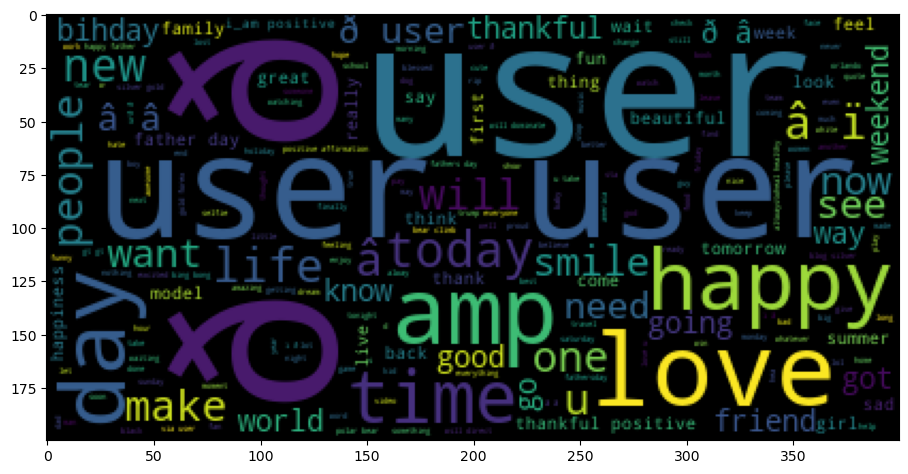

In [102]:
#Importing required
from wordcloud import WordCloud

#Creating combined wordcloud
plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined))

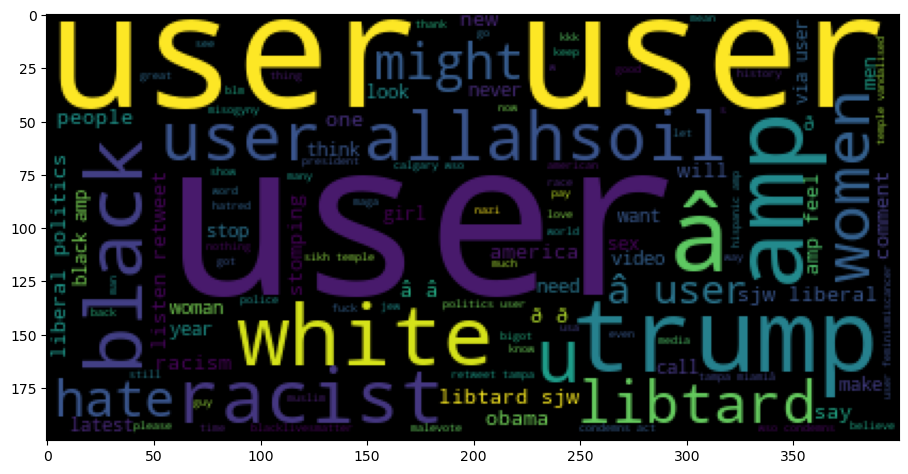

In [111]:
#Creating negative tweet wordcloud
sentences_neg = neg['tweet'].tolist()

#now neg sentences as one string
sentence_joined_neg = " ".join(sentences_neg)

plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined_neg))

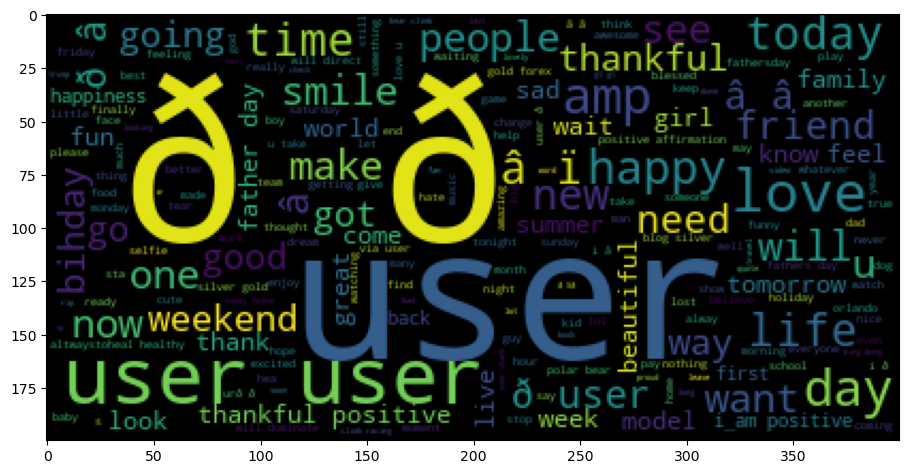

In [113]:
#Creating positive tweet wordcloud
sentences_pos = pos['tweet'].tolist()

#now neg sentences as one string
sentence_joined_pos = " ".join(sentences_pos)
plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined_pos ))